(434139, 2)


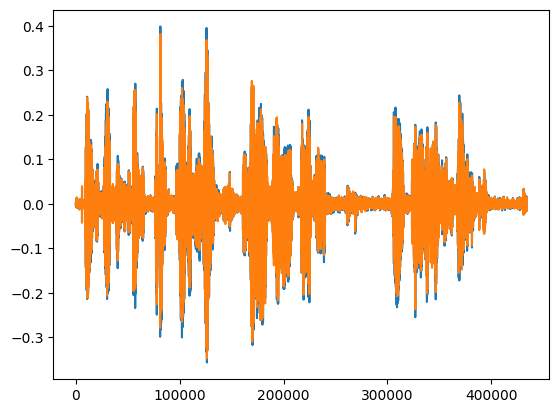

In [11]:
import soundfile as sf
from matplotlib import pyplot as plt
import numpy as np
import librosa
import librosa.display
from matplotlib import cm

# sf.read?
# help(sf.read)

wav, sample_rate = sf.read('beispiel.flac')
print(wav.shape)
434139 / sample_rate  # number of seconds units: 1 / (1 / s) = s

plt.plot(wav)
plt.show()

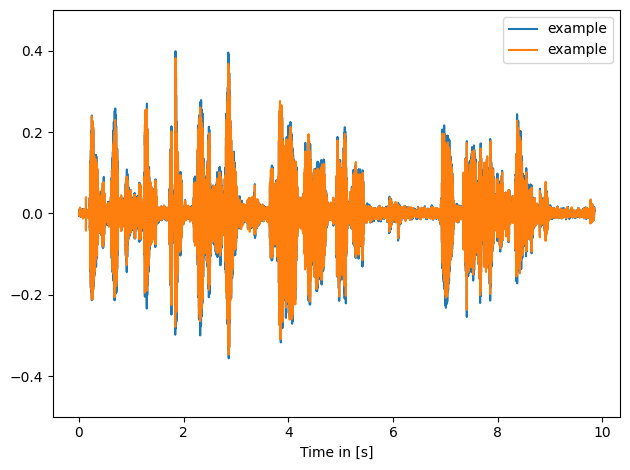

In [2]:
# plot wave with time on x-axis
time = np.array([step / sample_rate for step in range(len(wav))])
plt.plot(time, wav, label='example')
plt.xlabel('Time in [s]')
plt.ylim(-0.5, 0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
# let's compute a log-mel spectrogram as
# a feature representation of the wave form

def stereo_to_mono(wave, which="both"):
    """
    Extract a channel from a stereo wave

    Parameters
    ==========
    wave: np.array
        Input wave data.
    which: {"left", "right", "both"} default = "both"
        if `mono`, `which` indicates whether the *left* or the *right* channel
        should be extracted, or whether *both* channels should be averaged.

    Returns
    =======
    wave: np.array

    """
    if which == "left":
        return wave[:, 0]
    if which == "right":
        return wave[:, 1]
    return (wave[:, 0] + wave[:, 1])/2


wav_mono = stereo_to_mono(wav)
wav_mono.shape

(434139,)

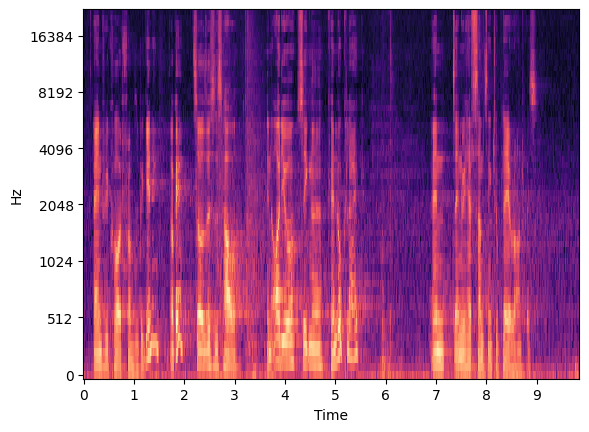

In [4]:
melspec = librosa.feature.melspectrogram(y=wav_mono, n_fft=1024, hop_length=220, n_mels=60, sr=sample_rate,  power=1.0, fmin=10, fmax=12000)
melspec_db = librosa.amplitude_to_db(melspec, ref=0.15)

# plot the log-mel spectrogram
librosa.display.specshow(melspec_db, y_axis='mel',  x_axis='time', sr=44100, hop_length=220, cmap=cm.magma)
plt.show()

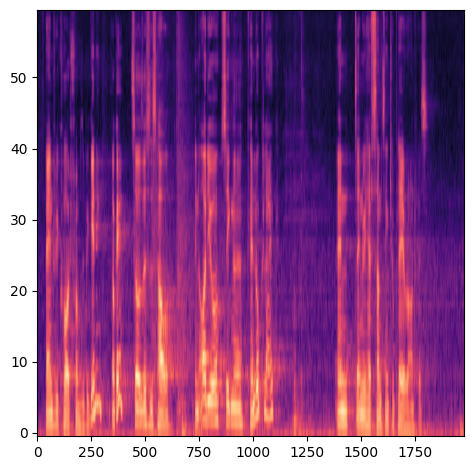

In [5]:
# you can also treat the melspec_db array as a picture:
plt.imshow(melspec_db, cmap=cm.magma, aspect=melspec_db.shape[1]/melspec_db.shape[0], origin='lower')
plt.tight_layout()
plt.show()

# What are the differences between plt.imshow() and librosa.display.specshow()?

# I adjusted the aspect ratio to make the picture look more like a spectrogram, as it was quite squeezed before.
# I also changed the origin to 'lower' to make the picture look more like a spectrogram, as the y-axis was inverted before.
# It seems like the librosa function has a different aspect ratio, the x axis is quite squeezed when using matplotlib.
# The resolution of the librosa function is also higher, the spectrogram looks more detailed.
# Another difference is the labeling of the axes, the librosa function has the frequency on the y-axis and the time on the x-axis,
# while matplotlib has frames on the x-axis and frequency on the y-axis (it does not seem to be logarithmic either).

In [13]:
# Run the code again for 'beispiel.mp3'. What is different?

wav, sample_rate = librosa.load('beispiel.mp3', sr=None)
wav.shape

(78755,)

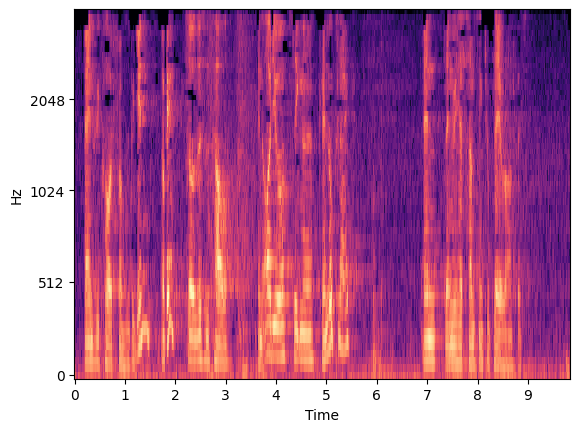

In [15]:
# You might want to change hop_length=40, n_fft=256, fmax=4000,
# and add a keyword:  win_length=186 to your librosa.feature.melspectrogram
# call. Why is this necessary?
melspec = librosa.feature.melspectrogram(y=wav, n_fft=256, hop_length=40, n_mels=60, sr=sample_rate,  power=1.0, fmin=10, fmax=4000, win_length=186)
melspec_db = librosa.amplitude_to_db(melspec, ref=0.15)

# This is necessary because the mp3 file has a different sample rate than the flac file. The flac file has a sample rate of 44100 Hz,
# while the mp3 file has a sample rate of 48000 Hz. 
# Adjusting the hop_length also adjusts how many samples overlap between two frames.
# The n_fft parameter is the number of samples in each frame. The win_length parameter is the length of the window function.
# The fmax parameter is the highest frequency to be included in the spectrogram. 
# All of these parameters need to be adjusted because the sample rate and compression algorithm of the mp3 file are different from the flac file.

# plot the log-mel spectrogram
librosa.display.specshow(melspec_db, y_axis='mel',  x_axis='time', sr=sample_rate, hop_length=40, cmap=cm.magma)
plt.show()